# Introduction

Comparison between Conlloovia and FCMA.

In [1]:
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "data.csv"
df = pd.read_csv(filename)
df.head()

,exp,napps,n_fam,cores,mem_mul,perf,frac_gap,add_ccs,Conlloovia_vars,Conlloovia_status,...,Fcma_1_0.5_pre_alloc_time_s,Fcma_1_0.5_alloc_time_s,Conlloovia_fault_tolerance_m_e_0.5,Fcma_1_0.5_fault_tolerance_m,Conlloovia_isolation_m,Fcma_1_0.5_isolation_m,Conlloovia_vm_recycling_m,Fcma_1_0.5_vm_recycling_m,Conlloovia_vm_load_balance_m,Fcma_1_0.5_vm_load_balance_m
0,0,1,1,0.12,2,0.02,0.02,False,1365,OPTIMAL,...,0.1071,0.0047,0.0,0.0,0.135000,0.076389,0.0,0.000000,0.250000,0.500000
1,1,1,1,0.12,2,0.40,0.02,False,285,OPTIMAL,...,0.0169,0.0300,1.0,0.0,0.307143,0.483333,0.0,0.000000,0.200000,0.333333
2,2,1,1,0.12,8,0.02,0.02,False,515,OPTIMAL,...,0.0170,0.0063,1.0,0.0,0.198292,0.087121,0.0,0.000000,0.125000,0.500000
3,3,1,1,0.12,8,0.40,0.02,False,120,OPTIMAL,...,0.0166,0.0033,0.0,0.0,0.500000,0.500000,1.0,1.000000,1.000000,1.000000
4,4,1,1,3.00,2,0.02,0.02,False,2385,OPTIMAL,...,0.0214,0.0531,1.0,1.0,0.091667,0.240079,0.0,0.633484,0.083333,0.083333


In [3]:
# Simplify the name of the column All_lower_bound_d_h_0.5 to bound
df = df.rename(columns={'All_lower_bound_d_h_0.5': 'bound'})

In [4]:
# If Conlloovia_status is ABORTED or CBC_ERROR, set the Conlloovia_cost_d_h to pd.Na
df.loc[
    df["Conlloovia_status"].isin(["ABORTED", "CBC_ERROR"]), "Conlloovia_cost_d_h"
] = pd.NA

# If Conlloovia_status is CBC_ERROR, set the Conlloovia llower_bound_d_h to pd.Na
df.loc[df["Conlloovia_status"] == "CBC_ERROR", "Conlloovia_lower_bound_d_h"] = pd.NA

df.loc[df["Conlloovia_status"].isin(["ABORTED", "CBC_ERROR"])].head()

,exp,napps,n_fam,cores,mem_mul,perf,frac_gap,add_ccs,Conlloovia_vars,Conlloovia_status,...,Fcma_1_0.5_pre_alloc_time_s,Fcma_1_0.5_alloc_time_s,Conlloovia_fault_tolerance_m_e_0.5,Fcma_1_0.5_fault_tolerance_m,Conlloovia_isolation_m,Fcma_1_0.5_isolation_m,Conlloovia_vm_recycling_m,Fcma_1_0.5_vm_recycling_m,Conlloovia_vm_load_balance_m,Fcma_1_0.5_vm_load_balance_m
36,36,5,1,3.00,2,0.02,0.02,False,99198,ABORTED,...,0.0392,0.3527,NaN,1.000000,NaN,0.087273,NaN,0.990683,NaN,0.166706
52,52,15,1,3.00,2,0.02,0.02,False,905634,ABORTED,...,0.0968,1.4056,NaN,1.000000,NaN,0.117406,NaN,0.999728,NaN,0.131371
54,54,15,1,3.00,8,0.02,0.02,False,663493,ABORTED,...,0.0961,11.2369,NaN,1.000000,NaN,0.127187,NaN,0.997392,NaN,0.149506
58,58,15,4,0.12,8,0.02,0.02,False,973865,ABORTED,...,0.5143,0.1148,NaN,0.266667,NaN,0.263030,NaN,0.793651,NaN,0.550000
60,60,15,4,3.00,2,0.02,0.02,False,2772144,ABORTED,...,0.3130,0.2014,NaN,1.000000,NaN,0.155195,NaN,0.974373,NaN,0.242379


In [5]:
# Create a new status column with these values:
# - "Optimal" if Conlloovia_status is "OPTIMAL"
# - "Feasible" if Conlloovia_status is "INTEGER_FEASIBLE"
# - "No solution" if Conlloovia_status is "ABORTED" or "CBC_ERROR"
df["Conlloovia status"] = df["Conlloovia_status"].map(
    {
        "OPTIMAL": "Optimal",
        "INTEGER_FEASIBLE": "Feasible",
        "ABORTED": "No solution",
        "CBC_ERROR": "No solution",
    }
)

# Create a new FCMA status column: "Optimal" if its cost is equal to Conlloovia_cost_d_h
# and Conlloovia status is "OPTIMAL", or FCMA cost is equal to the lower bound;
# "Feasible" otherwise
def fcma_status(row):
    if row["Fcma_1_0.5_cost_d_h"] == row["Conlloovia_cost_d_h"] and row["Conlloovia status"] == "Optimal":
        return "Optimal"
    elif row["Fcma_1_0.5_cost_d_h"] == row["bound"]:
        return "Optimal"
    else:
        return "Feasible"

df["FCMA status"] = df.apply(
    fcma_status,
    axis=1,
)

In [6]:
# Compute the ratio of cost FCMA/Conlloovia_cost and FCMA/bound
SPEEDS = [1]
SFMPLS = [0.5]

for speed in SPEEDS:
    for sfmpl in SFMPLS:
        df[f"ratio_cost_fcma_{speed}_{sfmpl}_con"] = df[f"Fcma_{speed}_{sfmpl}_cost_d_h"] / df[
            "Conlloovia_cost_d_h"
        ]
df[f"ratio_cost_fcma_bound"] = df[f"Fcma_1_0.5_cost_d_h"] / df["bound"]

In [7]:
# Compute total times
df["Conlloovia_total_time_s"] = df["Conlloovia_creation_time_s"] + df["Conlloovia_solving_time_s"]

for speed in SPEEDS:
    for sfmpl in SFMPLS:
        df[f"Fcma_{speed}_{sfmpl}_total_time_s"] = df[f"Fcma_{speed}_{sfmpl}_pre_alloc_time_s"] + df[
            f"Fcma_{speed}_{sfmpl}_alloc_time_s"
        ]

In [8]:

# Show a table with the statuses in the rows and the number of scenarios for each status
# of Conlloovia and FCMA. The order of the rows is "Optimal", "Feasible", "No solution".
# The result should be something like this:

conlloovia_status_counts = df["Conlloovia status"].value_counts()
fcma_status_counts = df["FCMA status"].value_counts()

# Concatenate the two series along the columns axis
status_counts = pd.concat([conlloovia_status_counts, fcma_status_counts], axis=1).fillna(0).astype(int)

# Rename the columns
status_counts.columns = ["Conlloovia", "FCMA"]

print(status_counts)

             Conlloovia  FCMA
Optimal              37    35
Feasible             28    45
No solution          15     0


In [9]:
# Print it in latex
print(status_counts.to_latex())

\begin{tabular}{lrr}
\toprule
 & Conlloovia & FCMA \\
\midrule
Optimal & 37 & 35 \\
Feasible & 28 & 45 \\
No solution & 15 & 0 \\
\bottomrule
\end{tabular}



In [10]:
# Find the smallest scenario where Conlloovia doesn't find a solution and the largest where it finds one
df.loc[df["Conlloovia status"] == "No solution"].sort_values("Conlloovia_vars").head(1)


,exp,napps,n_fam,cores,mem_mul,perf,frac_gap,add_ccs,Conlloovia_vars,Conlloovia_status,...,Conlloovia_vm_recycling_m,Fcma_1_0.5_vm_recycling_m,Conlloovia_vm_load_balance_m,Fcma_1_0.5_vm_load_balance_m,Conlloovia status,FCMA status,ratio_cost_fcma_1_0.5_con,ratio_cost_fcma_bound,Conlloovia_total_time_s,Fcma_1_0.5_total_time_s
36,36,5,1,3.0,2,0.02,0.02,False,99198,ABORTED,...,NaN,0.990683,NaN,0.166706,No solution,Feasible,NaN,1.026022,607.945,0.3919


In [11]:
df.loc[df["Conlloovia status"].isin(["Optimal", "Feasible"])].sort_values("Conlloovia_vars", ascending=False).head(1)

,exp,napps,n_fam,cores,mem_mul,perf,frac_gap,add_ccs,Conlloovia_vars,Conlloovia_status,...,Conlloovia_vm_recycling_m,Fcma_1_0.5_vm_recycling_m,Conlloovia_vm_load_balance_m,Fcma_1_0.5_vm_load_balance_m,Conlloovia status,FCMA status,ratio_cost_fcma_1_0.5_con,ratio_cost_fcma_bound,Conlloovia_total_time_s,Fcma_1_0.5_total_time_s
56,56,15,4,0.12,2,0.02,0.02,False,791231,INTEGER_FEASIBLE,...,0.0,0.895522,0.25,0.488889,Feasible,Feasible,0.68633,1.031661,660.8201,0.5979


# Figures

In [12]:
# Plot the problem size (Conlloovia variable count) vs the cost ratio of FCMA/Conlloovia
# and FCMA/bound, only with speed 1 and sfmpl 0.5. Use sns and use these markers:
# "o": ratio FCMA/Conlloovia if Conlloovia_status is not CBC_ERROR or ABORTED
# "x": ratio FCMA/Conlloovia if Conlloovia_status is CBC_ERROR or ABORTED
# "s": ratio FCMA/lower_bound if Conlloovia_status

# Put the data frame in the long format
df_long = pd.melt(
    df,
    id_vars=["Conlloovia_vars", "Conlloovia status", "FCMA status"],
    value_vars=["ratio_cost_fcma_1_0.5_con", "ratio_cost_fcma_bound"],
    var_name="ratio_type",
    value_name="ratio",
)

df_long.head()


,Conlloovia_vars,Conlloovia status,FCMA status,ratio_type,ratio
0,1365,Optimal,Optimal,ratio_cost_fcma_1_0.5_con,1.000000
1,285,Optimal,Optimal,ratio_cost_fcma_1_0.5_con,1.000000
2,515,Optimal,Optimal,ratio_cost_fcma_1_0.5_con,1.000000
3,120,Optimal,Optimal,ratio_cost_fcma_1_0.5_con,1.000000
4,2385,Optimal,Feasible,ratio_cost_fcma_1_0.5_con,1.023148


/tmp/ipykernel_1138543/858530552.py:47: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e7)


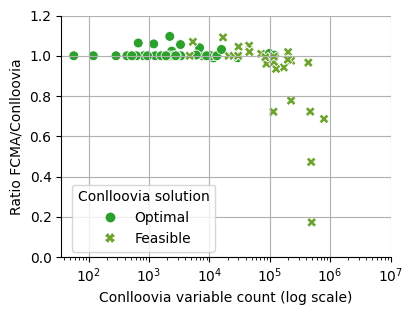

In [13]:
# Plot the ratio of cost FCMA/Conlloovia and FCMA/lower_bound vs the problem size
data_fig1 = df_long[(df_long["ratio_type"] == "ratio_cost_fcma_1_0.5_con") & (df_long["Conlloovia status"] != "No solution")]
g = sns.relplot(
    x="Conlloovia_vars",
    y="ratio",
    hue="Conlloovia status",
    style="Conlloovia status",
    col="ratio_type",
    col_wrap=1,
    kind="scatter",
    data=data_fig1,
    s=50, # size of the markers
    aspect=0.9,
    height=3.25,
    palette={"Optimal": "#2ca02c", "Feasible": "#6ba32d"},
)

g._legend.set_bbox_to_anchor((0.55, 0.38))  # Adjust the legend position
g._legend.remove()

# Use log for the x axis
plt.xscale("log")

# Improve the name of the ratio types and the conlloovia status
# plt.suptitle("Cost ratio FCMA/Conlloovia and FCMA/lower_bound vs problem size")
plt.xlabel("Conlloovia variable count (log scale)")

# Use as ylabel in the first row "Ratio FCMA/Conlloovia"
for ax, title in zip(g.axes.flat, ["Ratio FCMA/Conlloovia"]):
    ax.set_ylabel(title)

# Remove the titles of the rows
for ax in g.axes.flat:
    ax.set_title("")

plt.legend(bbox_to_anchor=(0.25, 0.3), loc='upper center', borderaxespad=0., title="Conlloovia solution").get_frame().set_facecolor('white')
# plt.legend().get_frame().set_facecolor('white')

# Move the legend down


# Add a grid
plt.grid()

# Improve the axis to compare with the next plot
plt.ylim(0, 1.2)
plt.xlim(0, 1e7)

plt.tight_layout()

plt.savefig(f"res_cost_1.png", dpi=600, bbox_inches='tight')

In [14]:
# Add a column indicating if Conlloovia found a solution (status is not "No solution").
# The values should be "Found" and "Not found"
df_long["Conlloovia solution"] = df_long["Conlloovia status"].map(
    {"No solution": "Not found", "Optimal": "Found", "Feasible": "Found"}
)

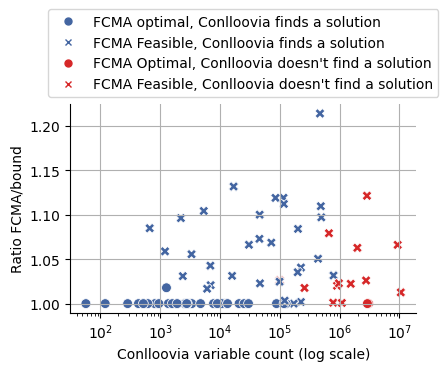

In [15]:
data_fig2 = df_long[df_long["ratio_type"] == "ratio_cost_fcma_bound"]
g = sns.relplot(
    x="Conlloovia_vars",
    y="ratio",
    hue="Conlloovia solution",
    style="FCMA status",
    col="ratio_type",
    col_wrap=1,
    kind="scatter",
    data=data_fig2,
    s=50, # size of the markers
    aspect=1.1,
    height=3.2,
    palette={"Found": "#4365a1", "Not found": "#d62728"},
)

# g._legend.set_bbox_to_anchor((0.55, 0.38))  # Adjust the legend position
g._legend.remove()

# Use log for the x axis
plt.xscale("log")

# Improve the name of the ratio types and the conlloovia status
# plt.suptitle("Cost ratio FCMA/Conlloovia and FCMA/lower_bound vs problem size")
plt.xlabel("Conlloovia variable count (log scale)")

# Use as ylabel in the first row "Ratio FCMA/lower_bound"
for ax, title in zip(g.axes.flat, ["Ratio FCMA/bound"]):
    ax.set_ylabel(title)

# Remove the titles of the rows
for ax in g.axes.flat:
    ax.set_title("")

# Add a background color to the legend
# g._legend.get_frame().set_facecolor('white')
# g._legend.get_frame().set_alpha(1)

legend_handles = [
    mlines.Line2D([], [], color='#4365a1', marker='o', linestyle='None', markersize=5, label='FCMA optimal, Conlloovia finds a solution'),
    mlines.Line2D([], [], color='#4365a1', marker='x', linestyle='None', markersize=5, label='FCMA Feasible, Conlloovia finds a solution'),
    mlines.Line2D([], [], color='#d62728', marker='o', linestyle='None', markersize=5, label='FCMA Optimal, Conlloovia doesn\'t find a solution'),
    mlines.Line2D([], [], color='#d62728', marker='x', linestyle='None', markersize=5, label='FCMA Feasible, Conlloovia doesn\'t find a solution'),
]

legend = plt.legend(handles=legend_handles, ncol=1, bbox_to_anchor=(0.5, 1), loc='lower center')
legend.get_frame().set_facecolor('white')

# Add a grid
plt.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig(f"res_cost_2.png", dpi=600, bbox_inches='tight')

In [16]:
# Show the value where the ratio is the highest
df_long[df_long["ratio"] == df_long["ratio"].max()]

,Conlloovia_vars,Conlloovia status,FCMA status,ratio_type,ratio,Conlloovia solution
159,469456,Feasible,Feasible,ratio_cost_fcma_bound,1.213955,Found


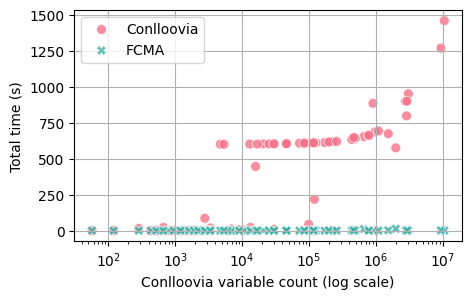

In [17]:
# Plot only the total times
df_total_times_long = pd.melt(
        df,
        id_vars=["Conlloovia_vars"],
        value_vars=[
            "Conlloovia_total_time_s",
            "Fcma_1_0.5_total_time_s",
        ],
        var_name="variable",
        value_name="value",
    )

plt.figure(figsize=(5, 3))
sns.scatterplot(
    x="Conlloovia_vars",
    y="value",
    hue="variable",
    style="variable",
    alpha=0.8,
    data=df_total_times_long,
    palette={"Conlloovia_total_time_s": "#f77189", "Fcma_1_0.5_total_time_s": "#36ada4"},
    s=50, # size of the markers
)

# Use log for the x
plt.xscale("log")

plt.legend(loc="upper left")

# Improve the name of the ratio types and the conlloovia status
plt.xlabel("Conlloovia variable count (log scale)")
plt.ylabel("Total time (s)")

plt.grid()

legend = plt.gca().get_legend()

# Define the new labels
new_labels = [
    "Conlloovia",
    "FCMA",
]

# Set the text of each legend item to the corresponding new label
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)

plt.savefig(f"res_time.png", dpi=600, bbox_inches='tight')

In [18]:
# Create a latex table with the average and maximum times (only total times)
print(df[["Conlloovia_total_time_s", "Fcma_1_0.5_total_time_s"]].agg(["mean", "max"]).T.to_latex(float_format="%.2f"))

\begin{tabular}{lrr}
\toprule
 & mean & max \\
\midrule
Conlloovia_total_time_s & 380.92 & 1460.46 \\
Fcma_1_0.5_total_time_s & 0.70 & 12.89 \\
\bottomrule
\end{tabular}



In [19]:
# Show the experiment where the FCMA time is the maximum
df.loc[df["Fcma_1_0.5_total_time_s"].idxmax()]

exp                                            70
napps                                          30
n_fam                                           1
cores                                         3.0
mem_mul                                         8
perf                                         0.02
frac_gap                                     0.02
add_ccs                                     False
Conlloovia_vars                           1982439
Conlloovia_status                         ABORTED
Conlloovia_lower_bound_d_h              1844.0158
bound                                     1848.96
Conlloovia_cost_d_h                           NaN
Fcma_1_0.5_cost_d_h                       1965.12
Conlloovia_creation_time_s               115.1242
Conlloovia_solving_time_s                460.7671
Fcma_1_0.5_pre_alloc_time_s                0.1775
Fcma_1_0.5_alloc_time_s                   12.7089
Conlloovia_fault_tolerance_m_e_0.5            NaN
Fcma_1_0.5_fault_tolerance_m                  1.0


In [20]:
# Obtain df_metrics_long, that has a column "metric" with the name of the metric (fault_tolerance_m, isolation_m, vm_load_balance_m and vm_recycling_m)
# and another indicating the technique (Conlloovia or FCMA; for the latter, using FCAM_1_0.5) and a column "value" with the value of the metric.
df_metrics_long = pd.melt(
    df,
    id_vars=["Conlloovia_vars"],
    value_vars=[
        "Conlloovia_fault_tolerance_m_e_0.5",
        "Fcma_1_0.5_fault_tolerance_m",
        "Conlloovia_isolation_m",
        "Fcma_1_0.5_isolation_m",
        "Conlloovia_vm_load_balance_m",
        "Fcma_1_0.5_vm_load_balance_m",
        "Conlloovia_vm_recycling_m",
        "Fcma_1_0.5_vm_recycling_m",
    ],
    var_name="variable",
    value_name="value",
)

def metric_from_var_name(var_name):
    if "fault_tolerance_m" in var_name:
        return "Fault tolerance"
    elif "isolation_m" in var_name:
        return "Container isolation"
    elif "vm_load_balance_m" in var_name:
        return "Load balancing reduction"
    elif "vm_recycling_m" in var_name:
        return "Node recycling"

# Add to df_metrics_long the metric name and if it's about Conlloovia or FCMA
df_metrics_long["metric"] = df_metrics_long.variable.apply(lambda x: metric_from_var_name(x))
df_metrics_long["technique"] = df_metrics_long.variable.apply(lambda x: "Conlloovia" if "Conlloovia" in x else "FCMA")


In [21]:
# Show the 5-, 50 and 95-percentiles instad of the min, mean and max
metric_summary = df_metrics_long.groupby(["metric", "technique"]).value.apply(lambda x: x.quantile([0.05, 0.5, 0.95])).unstack().unstack()
metric_summary

0.05                 0.50                 0.95  \
technique                Conlloovia      FCMA Conlloovia      FCMA Conlloovia   
metric                                                                          
Container isolation        0.022110  0.060562   0.267817  0.232583   0.976852   
Fault tolerance            0.000000  0.000000   0.000000  0.283333   1.000000   
Load balancing reduction   0.029029  0.129576   0.250000  0.494444   1.000000   
Node recycling             0.000000  0.000000   0.000000  0.851042   1.000000   

                               
technique                FCMA  
metric                         
Container isolation       1.0  
Fault tolerance           1.0  
Load balancing reduction  1.0  
Node recycling            1.0

In [22]:
print(metric_summary.to_latex(float_format="%.4f"))

\begin{tabular}{lrrrrrr}
\toprule
 & \multicolumn{2}{r}{0.050000} & \multicolumn{2}{r}{0.500000} & \multicolumn{2}{r}{0.950000} \\
technique & Conlloovia & FCMA & Conlloovia & FCMA & Conlloovia & FCMA \\
metric &  &  &  &  &  &  \\
\midrule
Container isolation & 0.0221 & 0.0606 & 0.2678 & 0.2326 & 0.9769 & 1.0000 \\
Fault tolerance & 0.0000 & 0.0000 & 0.0000 & 0.2833 & 1.0000 & 1.0000 \\
Load balancing reduction & 0.0290 & 0.1296 & 0.2500 & 0.4944 & 1.0000 & 1.0000 \\
Node recycling & 0.0000 & 0.0000 & 0.0000 & 0.8510 & 1.0000 & 1.0000 \\
\bottomrule
\end{tabular}

